<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 27 **
** ┗ Drought level prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Data for drought level」
* 🥈SESSION 2 -「Serious Serious Area」
* 🥇SESSION 3 -「Establishment of measures by identifying drought trends」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/27_Obesity Level Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/27_Obesity Level Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 💦 (Climate Analyst)

``
Recently, the number of local damage has been increasing due to drought.Efficient resources to the government have restricted resources,
It is a situation that needs to be proceeded.As a result, we will first explore the serious drought areas and proceed with recovery according to priority.

``


> ** Looking at the data **

* Drought level measurement data
* Data specification ⬇

| map_date | State_abb | Valid_start | Valid_end | STAT_FMT | DROUGHT_LVL |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Measurement date | Lord | Measurement Date | Measurement End date | Statistical FMT | Drought level |
| Area_PCT | Area_toto | POP_PCT | POP_TOTAL |
| Regional Quantity ratio | All of the regional moisture | Water storage ratio | Total amount of water storage |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter27_drought.csv')
df.head(6)

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
0,20210713,AK,2021-07-13,2021-07-19,1,NaN,74.35,433133.18,33.91,240644.16
1,20210713,AK,2021-07-13,2021-07-19,1,D0,25.65,149435.11,66.09,468985.84
2,20210713,AK,2021-07-13,2021-07-19,1,D1,0.00,0.00,0.00,0.00
3,20210713,AK,2021-07-13,2021-07-19,1,D2,0.00,0.00,0.00,0.00
4,20210713,AK,2021-07-13,2021-07-19,1,D3,0.00,0.00,0.00,0.00
5,20210713,AK,2021-07-13,2021-07-19,1,D4,0.00,0.00,0.00,0.00



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Due to the severe drought, first recovery area is unclear
``

> ** Expected effect **

``
▶ Drought severe exploration and priority recovery area selection and restoration start
``

> ** Solution **

``
▶ Drought recovery first recovery zone selection and available resource use recovery
▶ Session 1 🥉
-Data pretreatment and drought data EDA
▶ Session 2 🥈
-Check the drought level by region and analyze droughts by monthly drought
▶ Session 3 🥇
-Selection of strategy and first recovery area
``



> ** Performance measurement **

``
▶ Local recovery rate and drought alarm downward
``

> ** Public application **

``
▶ Drought serious area search and priority recovery
``

> ** Main code preview **

``
▶ Session 1 → PIVOT_TABLE ()
▶ SESSION 2 → SNS.BARPLOT
▶ Session 3 → Isin ()
``




## ** 🥉Session 1 **
** ┗ Data exploration by drought level **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 325,728 ROW, consisting of 10 colors
print('df', df.shape)

df (325728, 10)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   map_date     325728 non-null  int64  
 1   state_abb    325728 non-null  object 
 2   valid_start  325728 non-null  object 
 3   valid_end    325728 non-null  object 
 4   stat_fmt     325728 non-null  int64  
 5   drought_lvl  271440 non-null  object 
 6   area_pct     325728 non-null  float64
 7   area_total   322513 non-null  float64
 8   pop_pct      325728 non-null  float64
 9   pop_total    322116 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 24.9+ MB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

map_date           0
state_abb          0
valid_start        0
valid_end          0
stat_fmt           0
drought_lvl    54288
area_pct           0
area_total      3215
pop_pct            0
pop_total       3612
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,map_date,stat_fmt,area_pct,area_total,pop_pct,pop_total
count,3.257280e+05,325728.0,325728.000000,322513.000000,325728.000000,3.221160e+05
mean,2.011103e+07,1.0,22.975505,17008.394861,22.418064,1.387939e+06
std,5.787383e+04,0.0,35.153066,41068.300091,35.929533,3.764989e+06
min,2.001072e+07,1.0,0.000000,0.000000,0.000000,0.000000e+00
25%,2.006072e+07,1.0,0.000000,0.000000,0.000000,0.000000e+00
50%,2.011072e+07,1.0,0.000000,0.000000,0.000000,0.000000e+00
75%,2.016071e+07,1.0,39.640000,17557.420000,34.380000,8.979340e+05
max,2.021071e+07,1.0,100.000000,582568.290000,101.800000,3.725396e+07


In [ ]:
# ▶ DATA is piled up on a row basis at a regional weekly week, and it is loaded from the drought level none to D4
# ▶ Data that is difficult to use at the current level
df.head(12)

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
0,20210713,AK,2021-07-13,2021-07-19,1,NaN,74.35,433133.18,33.91,240644.16
1,20210713,AK,2021-07-13,2021-07-19,1,D0,25.65,149435.11,66.09,468985.84
2,20210713,AK,2021-07-13,2021-07-19,1,D1,0.00,0.00,0.00,0.00
3,20210713,AK,2021-07-13,2021-07-19,1,D2,0.00,0.00,0.00,0.00
4,20210713,AK,2021-07-13,2021-07-19,1,D3,0.00,0.00,0.00,0.00
5,20210713,AK,2021-07-13,2021-07-19,1,D4,0.00,0.00,0.00,0.00
6,20210706,AK,2021-07-06,2021-07-12,1,NaN,74.35,433133.18,33.91,240644.16
7,20210706,AK,2021-07-06,2021-07-12,1,D0,25.65,149435.11,66.09,468985.84
8,20210706,AK,2021-07-06,2021-07-12,1,D1,0.00,0.00,0.00,0.00
9,20210706,AK,2021-07-06,2021-07-12,1,D2,0.00,0.00,0.00,0.00


In [ ]:
# ▶ You have to convert it to an unique ROW based on the region and date
df = df.pivot_table(index=['map_date', 'state_abb', 'valid_start', 'valid_end', 'stat_fmt'], columns='drought_lvl', values=['area_pct', 'area_total', 'pop_pct', 'pop_total'])
df = pd.DataFrame(df).reset_index()

In [ ]:
df.head(5)

map_date state_abb valid_start   valid_end stat_fmt area_pct  \
drought_lvl                                                            D0   
0            20010717        AK  2001-07-17  2001-07-23        1     2.08   
1            20010717        AL  2001-07-17  2001-07-23        1     0.01   
2            20010717        AR  2001-07-17  2001-07-23        1    50.95   
3            20010717        AZ  2001-07-17  2001-07-23        1     0.00   
4            20010717        CA  2001-07-17  2001-07-23        1    44.06   

                                      ... pop_pct                          \
drought_lvl     D1     D2    D3   D4  ...      D0     D1    D2    D3   D4   
0             0.00   0.00  0.00  0.0  ...    7.29   0.00  0.00  0.00  0.0   
1             0.00   0.00  0.00  0.0  ...    0.00   0.00  0.00  0.00  0.0   
2            18.05   5.84  0.00  0.0  ...   55.36  15.16  6.95  0.00  0.0   
3             0.00   0.00  0.00  0.0  ...    0.00   0.00  0.00  0.00  0.0   
4            27.19  19.79  9.69  0.0  ...   25.34   3.48  1.92  0.56  0.0   

              pop_total                                         
drought_lvl          D0          D1         D2         D3   D4  
0              51730.64        0.00       0.00       0.00  0.0  
1                156.30        0.00       0.00       0.00  0.0  
2            1614202.92   442080.04  202591.07       0.00  0.0  
3                  0.00        0.00       0.00       0.00  0.0  
4            9440307.02  1296768.92  713824.68  208064.43  0.0  

[5 rows x 25 columns]

In [ ]:
# ▶ Multi Index is set to one cole when granting a name per cola
df.columns=['map_date', 'state_abb', 'valid_start', 'valid_end', 'stat_fmt',
       'D0_area_pct', 'D1_area_pct', 'D2_area_pct', 'D3_area_pct', 'D4_area_pct', 'None_area_pct',
       'D0_area_total', 'D1_area_total', 'D2_area_total', 'D3_area_total', 'D4_area_total', 'None_area_total',
       'D0_pop_pct', 'D1_pop_pct', 'D2_pop_pct', 'D3_pop_pct', 'D4_pop_pct', 'None_pop_pct',
       'D0_pop_total', 'D1_pop_total', 'D2_pop_total', 'D3_pop_total', 'D4_pop_total', 'None_pop_total']

ValueError: Length mismatch: Expected axis has 25 elements, new values have 29 elements

In [ ]:
pd.set_option('display.max_columns', 500)
df.head(5)

map_date state_abb valid_start   valid_end stat_fmt area_pct  \
drought_lvl                                                            D0   
0            20010717        AK  2001-07-17  2001-07-23        1     2.08   
1            20010717        AL  2001-07-17  2001-07-23        1     0.01   
2            20010717        AR  2001-07-17  2001-07-23        1    50.95   
3            20010717        AZ  2001-07-17  2001-07-23        1     0.00   
4            20010717        CA  2001-07-17  2001-07-23        1    44.06   

                                     area_total                                \
drought_lvl     D1     D2    D3   D4         D0        D1        D2        D3   
0             0.00   0.00  0.00  0.0   12091.73      0.00      0.00      0.00   
1             0.00   0.00  0.00  0.0       3.32      0.00      0.00      0.00   
2            18.05   5.84  0.00  0.0   27087.20   9593.26   3102.19      0.00   
3             0.00   0.00  0.00  0.0       0.00      0.00      0.00      0.00   
4            27.19  19.79  9.69  0.0   69676.70  43005.24  31291.14  15322.64   

                 pop_pct                           pop_total              \
drought_lvl   D4      D0     D1    D2    D3   D4          D0          D1   
0            0.0    7.29   0.00  0.00  0.00  0.0    51730.64        0.00   
1            0.0    0.00   0.00  0.00  0.00  0.0      156.30        0.00   
2            0.0   55.36  15.16  6.95  0.00  0.0  1614202.92   442080.04   
3            0.0    0.00   0.00  0.00  0.00  0.0        0.00        0.00   
4            0.0   25.34   3.48  1.92  0.56  0.0  9440307.02  1296768.92   

                                        
drought_lvl         D2         D3   D4  
0                 0.00       0.00  0.0  
1                 0.00       0.00  0.0  
2            202591.07       0.00  0.0  
3                 0.00       0.00  0.0  
4            713824.68  208064.43  0.0

In [ ]:
# ▶ Order
df = df[['map_date', 'state_abb', 'valid_start', 'valid_end', 'stat_fmt',
       'None_area_pct', 'D0_area_pct', 'D1_area_pct', 'D2_area_pct', 'D3_area_pct', 'D4_area_pct',
       'None_pop_pct', 'D0_pop_pct', 'D1_pop_pct', 'D2_pop_pct', 'D3_pop_pct', 'D4_pop_pct',
       'None_area_total', 'D0_area_total', 'D1_area_total', 'D3_area_total', 'D4_area_total',
       'None_pop_total', 'D0_pop_total', 'D1_pop_total', 'D3_pop_total', 'D4_pop_total']]
df.head(5)

KeyError: "['None_area_pct' 'D0_area_pct' 'D1_area_pct' 'D2_area_pct' 'D3_area_pct'\n 'D4_area_pct' 'None_pop_pct' 'D0_pop_pct' 'D1_pop_pct' 'D2_pop_pct'\n 'D3_pop_pct' 'D4_pop_pct' 'None_area_total' 'D0_area_total'\n 'D1_area_total' 'D3_area_total' 'D4_area_total' 'None_pop_total'\n 'D0_pop_total' 'D1_pop_total' 'D3_pop_total' 'D4_pop_total'] not in index"

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

map_date              0
state_abb             0
valid_start           0
valid_end             0
stat_fmt              0
None_area_pct         0
D0_area_pct           0
D1_area_pct           0
D2_area_pct           0
D3_area_pct           0
D4_area_pct           0
None_pop_pct          0
D0_pop_pct            0
D1_pop_pct            0
D2_pop_pct            0
D3_pop_pct            0
D4_pop_pct            0
None_area_total       0
D0_area_total         0
D1_area_total         0
D3_area_total         0
D4_area_total      3215
None_pop_total        0
D0_pop_total          0
D1_pop_total          0
D3_pop_total          0
D4_pop_total       3612
dtype: int64


In [ ]:
# ▶ NULL values ​​are replaced by 0
df.fillna(0, inplace=True)

In [ ]:
df.head(5)

,map_date,state_abb,valid_start,valid_end,stat_fmt,None_area_pct,D0_area_pct,D1_area_pct,D2_area_pct,D3_area_pct,D4_area_pct,None_pop_pct,D0_pop_pct,D1_pop_pct,D2_pop_pct,D3_pop_pct,D4_pop_pct,None_area_total,D0_area_total,D1_area_total,D3_area_total,D4_area_total,None_pop_total,D0_pop_total,D1_pop_total,D3_pop_total,D4_pop_total
0,20010717,AK,2001-07-17,2001-07-23,1,97.92,2.08,0.00,0.00,0.00,0.0,92.71,7.29,0.00,0.00,0.00,0.0,570476.56,12091.73,0.00,0.00,0.0,657899.35,51730.64,0.00,0.00,0.0
1,20010717,AL,2001-07-17,2001-07-23,1,99.99,0.01,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.0,51601.03,3.32,0.00,0.00,0.0,4779579.72,156.30,0.00,0.00,0.0
2,20010717,AR,2001-07-17,2001-07-23,1,49.05,50.95,18.05,5.84,0.00,0.0,44.64,55.36,15.16,6.95,0.00,0.0,26075.56,27087.20,9593.26,0.00,0.0,1301715.06,1614202.92,442080.04,0.00,0.0
3,20010717,AZ,2001-07-17,2001-07-23,1,100.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.0,114034.82,0.00,0.00,0.00,0.0,6392017.00,0.00,0.00,0.00,0.0
4,20010717,CA,2001-07-17,2001-07-23,1,55.94,44.06,27.19,19.79,9.69,0.0,74.66,25.34,3.48,1.92,0.56,0.0,88471.17,69676.70,43005.24,15322.64,0.0,27813649.39,9440307.02,1296768.92,208064.43,0.0


### · Check the drought level
---


In [ ]:
# ▶ Check how many regions there are (52 places)
len(df['state_abb'].unique())

52

In [ ]:
# ▶ Drought History Data during 1,044 Week by region
df['state_abb'].value_counts().head(10)

AK    1044
AL    1044
ND    1044
NE    1044
NH    1044
NJ    1044
NM    1044
NV    1044
NY    1044
OH    1044
Name: state_abb, dtype: int64

In [ ]:
# ▶ Drought History Data during 1,044 Week by region
df[df['state_abb'] == 'AK'].sort_values('map_date')

,map_date,state_abb,valid_start,valid_end,stat_fmt,None_area_pct,D0_area_pct,D1_area_pct,D2_area_pct,D3_area_pct,D4_area_pct,None_pop_pct,D0_pop_pct,D1_pop_pct,D2_pop_pct,D3_pop_pct,D4_pop_pct,None_area_total,D0_area_total,D1_area_total,D3_area_total,D4_area_total,None_pop_total,D0_pop_total,D1_pop_total,D3_pop_total,D4_pop_total
0,20010717,AK,2001-07-17,2001-07-23,1,97.92,2.08,0.0,0.0,0.0,0.0,92.71,7.29,0.0,0.0,0.0,0.0,570476.56,12091.73,0.0,0.0,0.0,657899.35,51730.64,0.0,0.0,0.0
52,20010724,AK,2001-07-24,2001-07-30,1,97.92,2.08,0.0,0.0,0.0,0.0,92.71,7.29,0.0,0.0,0.0,0.0,570476.56,12091.73,0.0,0.0,0.0,657899.35,51730.64,0.0,0.0,0.0
104,20010731,AK,2001-07-31,2001-08-06,1,100.00,0.00,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,582568.29,0.00,0.0,0.0,0.0,709629.99,0.00,0.0,0.0,0.0
156,20010807,AK,2001-08-07,2001-08-13,1,100.00,0.00,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,582568.29,0.00,0.0,0.0,0.0,709629.99,0.00,0.0,0.0,0.0
208,20010814,AK,2001-08-14,2001-08-20,1,100.00,0.00,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,582568.29,0.00,0.0,0.0,0.0,709629.99,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54028,20210615,AK,2021-06-15,2021-06-21,1,85.92,14.08,0.0,0.0,0.0,0.0,98.96,1.04,0.0,0.0,0.0,0.0,500539.66,82028.63,0.0,0.0,0.0,702217.65,7412.34,0.0,0.0,0.0
54080,20210622,AK,2021-06-22,2021-06-28,1,85.92,14.08,0.0,0.0,0.0,0.0,98.96,1.04,0.0,0.0,0.0,0.0,500539.66,82028.63,0.0,0.0,0.0,702217.65,7412.34,0.0,0.0,0.0
54132,20210629,AK,2021-06-29,2021-07-05,1,85.92,14.08,0.0,0.0,0.0,0.0,98.96,1.04,0.0,0.0,0.0,0.0,500539.66,82028.63,0.0,0.0,0.0,702217.65,7412.34,0.0,0.0,0.0
54184,20210706,AK,2021-07-06,2021-07-12,1,74.35,25.65,0.0,0.0,0.0,0.0,33.91,66.09,0.0,0.0,0.0,0.0,433133.18,149435.11,0.0,0.0,0.0,240644.16,468985.84,0.0,0.0,0.0


In [ ]:
# ▶ Data from 2001 to 2021
df['map_date'].min(), df['map_date'].max()

(20010717, 20210713)

## ** 🥈Session 2 **
** ┗ Drought severe area search **
---


### · Drought level grant
---


In [ ]:
# ▶ The drought level is from None to D4, and if it is D4, drought level data from None to D3 is loaded.
import numpy as np
df['level'] = np.where( (df['None_area_pct'] != 0) & (df['D0_area_pct'] == 0) & (df['D1_area_pct'] == 0) & (df['D2_area_pct'] == 0) & (df['D3_area_pct'] == 0) & (df['D4_area_pct'] == 0), 'None',
                        np.where(   (df['D0_area_pct'] != 0) & (df['D1_area_pct'] == 0) & (df['D2_area_pct'] == 0) & (df['D3_area_pct'] == 0) & (df['D4_area_pct'] == 0), 'D0',
                                 np.where(   (df['D1_area_pct'] != 0) & (df['D2_area_pct'] == 0) & (df['D3_area_pct'] == 0) & (df['D4_area_pct'] == 0), 'D1',
                                          np.where(  (df['D2_area_pct'] != 0) & (df['D3_area_pct'] == 0) & (df['D4_area_pct'] == 0), 'D2',
                                                   np.where(   (df['D3_area_pct'] != 0) & (df['D4_area_pct'] == 0), 'D3', 'D4')))))


### · Regional drought level
---


In [ ]:
# ▶ Counts of drought levels by region
df_gp = pd.DataFrame(df.groupby(['state_abb', 'level'], as_index=False)['map_date'].count())
df_gp.head(6)

,state_abb,level,map_date
0,AK,D0,587
1,AK,D1,146
2,AK,D2,47
3,AK,D3,21
4,AK,None,243
5,AL,D0,217


In [ ]:
# ▶ Pivot table use data refining
df_pivot=df_gp.pivot_table(index=['state_abb'], columns='level', values=['map_date'])
df_pivot=pd.DataFrame(df_pivot).reset_index()
df_pivot.fillna(0, inplace=True)
df_pivot.head(5)

state_abb map_date                                   
level                 D0     D1     D2     D3     D4   None
0            AK    587.0  146.0   47.0   21.0    0.0  243.0
1            AL    217.0  198.0  124.0  150.0   99.0  256.0
2            AR    251.0  224.0  135.0  144.0   52.0  238.0
3            AZ     24.0  152.0  298.0  328.0  218.0   24.0
4            CA    109.0  128.0  341.0  279.0  187.0    0.0

In [ ]:
# ▶ Order alignment
df_pivot.columns = ['state_abb', 'D0', 'D1', 'D2', 'D3', 'D4', 'None']
df_pivot = df_pivot[['state_abb', 'None', 'D0', 'D1', 'D2', 'D3', 'D4']]
df_pivot.head(10)

,state_abb,None,D0,D1,D2,D3,D4
0,AK,243.0,587.0,146.0,47.0,21.0,0.0
1,AL,256.0,217.0,198.0,124.0,150.0,99.0
2,AR,238.0,251.0,224.0,135.0,144.0,52.0
3,AZ,24.0,24.0,152.0,298.0,328.0,218.0
4,CA,0.0,109.0,128.0,341.0,279.0,187.0
5,CO,8.0,119.0,205.0,217.0,195.0,300.0
6,CT,619.0,200.0,144.0,55.0,26.0,0.0
7,DC,758.0,124.0,113.0,35.0,14.0,0.0
8,DE,668.0,178.0,98.0,78.0,20.0,2.0
9,FL,231.0,255.0,235.0,159.0,145.0,19.0


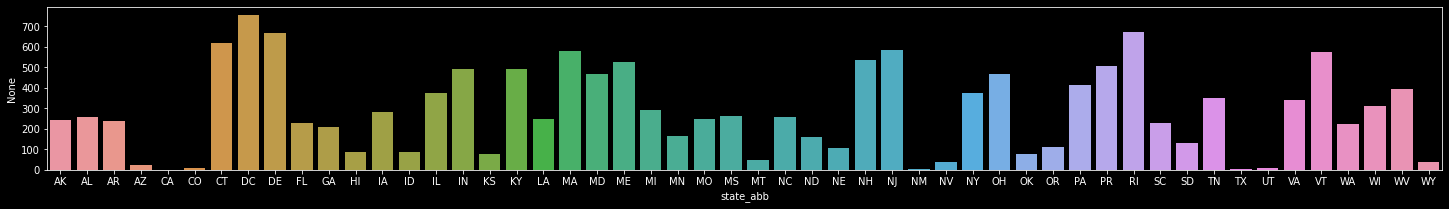

In [ ]:
# ▶ Regional summit (WEEK) number status
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.barplot(x="state_abb", y='None', data=df_pivot);
plt.gcf().set_size_inches(25, 3)

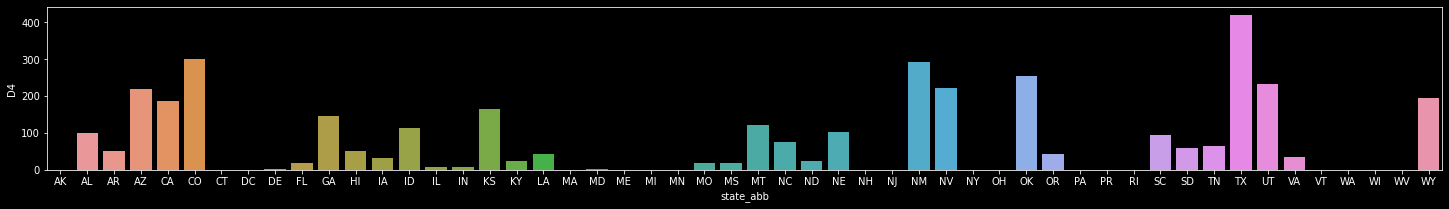

In [ ]:
# ▶ Regional D4 -Severe stage, weekly number status
# ▶ In the case of CT, DC, and DE areas, which had a lot of normal days, you can see that there are few Counts in the D4 stage.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.barplot(x="state_abb", y='D4', data=df_pivot);
plt.gcf().set_size_inches(25, 3)

### · Drought trend analysis by month
---
* For the long -term plan, it is necessary to know where the month is the most serious month of the month.


In [ ]:
df.head(5)

,map_date,state_abb,valid_start,valid_end,stat_fmt,None_area_pct,D0_area_pct,D1_area_pct,D2_area_pct,D3_area_pct,D4_area_pct,None_pop_pct,D0_pop_pct,D1_pop_pct,D2_pop_pct,D3_pop_pct,D4_pop_pct,None_area_total,D0_area_total,D1_area_total,D3_area_total,D4_area_total,None_pop_total,D0_pop_total,D1_pop_total,D3_pop_total,D4_pop_total,level
0,20010717,AK,2001-07-17,2001-07-23,1,97.92,2.08,0.00,0.00,0.00,0.0,92.71,7.29,0.00,0.00,0.00,0.0,570476.56,12091.73,0.00,0.00,0.0,657899.35,51730.64,0.00,0.00,0.0,D0
1,20010717,AL,2001-07-17,2001-07-23,1,99.99,0.01,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.0,51601.03,3.32,0.00,0.00,0.0,4779579.72,156.30,0.00,0.00,0.0,D0
2,20010717,AR,2001-07-17,2001-07-23,1,49.05,50.95,18.05,5.84,0.00,0.0,44.64,55.36,15.16,6.95,0.00,0.0,26075.56,27087.20,9593.26,0.00,0.0,1301715.06,1614202.92,442080.04,0.00,0.0,D2
3,20010717,AZ,2001-07-17,2001-07-23,1,100.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.0,114034.82,0.00,0.00,0.00,0.0,6392017.00,0.00,0.00,0.00,0.0,None
4,20010717,CA,2001-07-17,2001-07-23,1,55.94,44.06,27.19,19.79,9.69,0.0,74.66,25.34,3.48,1.92,0.56,0.0,88471.17,69676.70,43005.24,15322.64,0.0,27813649.39,9440307.02,1296768.92,208064.43,0.0,D3


In [ ]:
# ▶ STR use year, month COL generation
df['year'] = df['map_date'].astype(str).str[:4]
df['month'] = df['map_date'].astype(str).str[4:6]

df[['map_date', 'year', 'month']]

,map_date,year,month
0,20010717,2001,07
1,20010717,2001,07
2,20010717,2001,07
3,20010717,2001,07
4,20010717,2001,07
...,...,...,...
54283,20210713,2021,07
54284,20210713,2021,07
54285,20210713,2021,07
54286,20210713,2021,07


In [ ]:
# ▶ D4, which is a serious stage, is couont for each month and month
df_d4 = df[df['level']=='D4'].groupby(['year', 'month'], as_index = False)['level'].count()
df_d4.head(5)

,year,month,level
0,2002,04,1
1,2002,05,8
2,2002,06,22
3,2002,07,40
4,2002,08,53


In [ ]:
# ▶ Bring only the last 5 years data
df_d4_5 = df_d4[df_d4['year'].isin(['2017', '2018', '2019', '2020', '2021'])]
df_d4_5['year'].value_counts()

2018    10
2020     9
2021     7
2017     5
2019     4
Name: year, dtype: int64

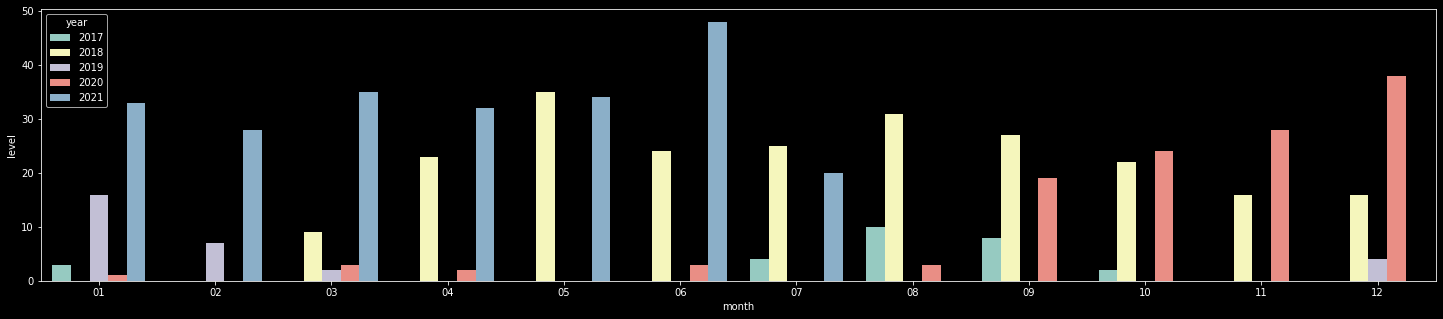

In [ ]:
# ▶ The last 5 years, the pattern is too different
sns.barplot(x='month', y='level', hue='year', data = df_d4_5,
             order = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']);
plt.gcf().set_size_inches(25 ,5)

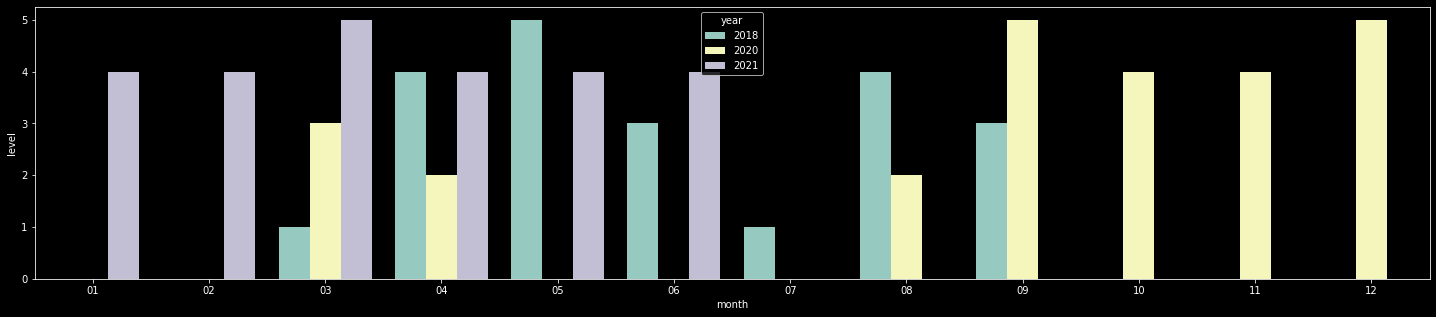

In [ ]:
# ▶ In the last five years, the most serious area TX (Texas) and State (State)
sns.barplot(x='month', y='level', hue='year', data = df_tx,
             order = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']);
plt.gcf().set_size_inches(25 ,5)

## ** 🥇Session 3 **
** ┗ Establishment of measures by grasping drought trends **
---


### · Selected as a priority
---


In [ ]:
# ▶ Priority decision to 10 cities with the highest number of times down to D4
df_pivot.head(5)

,state_abb,None,D0,D1,D2,D3,D4
0,AK,243.0,587.0,146.0,47.0,21.0,0.0
1,AL,256.0,217.0,198.0,124.0,150.0,99.0
2,AR,238.0,251.0,224.0,135.0,144.0,52.0
3,AZ,24.0,24.0,152.0,298.0,328.0,218.0
4,CA,0.0,109.0,128.0,341.0,279.0,187.0


In [ ]:
# ▶ Sorted by D4
df_top10 = df_pivot.sort_values(by=['D4'], ascending = False).head(10)
df_top10['total'] = df_top10['D0'] + df_top10['D1'] + df_top10['D2'] + df_top10['D3'] + df_top10['D4'] + df_top10['None']

In [ ]:
df_top10

,state_abb,None,D0,D1,D2,D3,D4,total
44,TX,3.0,81.0,144.0,151.0,244.0,421.0,1044.0
5,CO,8.0,119.0,205.0,217.0,195.0,300.0,1044.0
32,NM,5.0,63.0,231.0,210.0,242.0,293.0,1044.0
36,OK,77.0,94.0,180.0,240.0,198.0,255.0,1044.0
45,UT,11.0,86.0,236.0,327.0,151.0,233.0,1044.0
33,NV,39.0,128.0,122.0,243.0,290.0,222.0,1044.0
3,AZ,24.0,24.0,152.0,298.0,328.0,218.0,1044.0
51,WY,40.0,126.0,286.0,184.0,214.0,194.0,1044.0
4,CA,0.0,109.0,128.0,341.0,279.0,187.0,1044.0
16,KS,78.0,134.0,186.0,189.0,292.0,165.0,1044.0


In [ ]:
# ▶ Sorted by RATIO (D4 level opponent)
df_pivot['ratio'] = df_pivot['D4'] / df_pivot['None']
df_pivot['ratio'] = np.where(df_pivot['ratio'] == np.inf, df_pivot['D4'], df_pivot['ratio'])
df_pivot.head(5)

,state_abb,None,D0,D1,D2,D3,D4,ratio
0,AK,243.0,587.0,146.0,47.0,21.0,0.0,0.000000
1,AL,256.0,217.0,198.0,124.0,150.0,99.0,0.386719
2,AR,238.0,251.0,224.0,135.0,144.0,52.0,0.218487
3,AZ,24.0,24.0,152.0,298.0,328.0,218.0,9.083333
4,CA,0.0,109.0,128.0,341.0,279.0,187.0,187.000000


In [ ]:
df_top10_2 = df_pivot.sort_values(by=['ratio'], ascending = False).head(10)
df_top10_2

,state_abb,None,D0,D1,D2,D3,D4,ratio
4,CA,0.0,109.0,128.0,341.0,279.0,187.0,187.000000
44,TX,3.0,81.0,144.0,151.0,244.0,421.0,140.333333
32,NM,5.0,63.0,231.0,210.0,242.0,293.0,58.600000
5,CO,8.0,119.0,205.0,217.0,195.0,300.0,37.500000
45,UT,11.0,86.0,236.0,327.0,151.0,233.0,21.181818
3,AZ,24.0,24.0,152.0,298.0,328.0,218.0,9.083333
33,NV,39.0,128.0,122.0,243.0,290.0,222.0,5.692308
51,WY,40.0,126.0,286.0,184.0,214.0,194.0,4.850000
36,OK,77.0,94.0,180.0,240.0,198.0,255.0,3.311688
26,MT,50.0,156.0,200.0,200.0,316.0,122.0,2.440000


In [ ]:
# ▶ D4 count ranking vs ratio ranking
4     CA   4     CA
44    TX   44    TX
32    NM   32    NM
5     CO   5     CO
45    UT   45    UT
3     AZ   3     AZ
33    NV   33    NV
51    WY   51    WY
36    OK   36    OK
26    MT   16    KS

### · Severe stage (D4)> Water storage ratio


In [ ]:
# ▶ When you go down to D4, the area with the lowest water storage rate is difficult to operate independently.
df.head(5)

,map_date,state_abb,valid_start,valid_end,stat_fmt,None_area_pct,D0_area_pct,D1_area_pct,D2_area_pct,D3_area_pct,D4_area_pct,None_pop_pct,D0_pop_pct,D1_pop_pct,D2_pop_pct,D3_pop_pct,D4_pop_pct,None_area_total,D0_area_total,D1_area_total,D3_area_total,D4_area_total,None_pop_total,D0_pop_total,D1_pop_total,D3_pop_total,D4_pop_total,level,year,month
0,20010717,AK,2001-07-17,2001-07-23,1,97.92,2.08,0.00,0.00,0.00,0.0,92.71,7.29,0.00,0.00,0.00,0.0,570476.56,12091.73,0.00,0.00,0.0,657899.35,51730.64,0.00,0.00,0.0,D0,2001,07
1,20010717,AL,2001-07-17,2001-07-23,1,99.99,0.01,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.0,51601.03,3.32,0.00,0.00,0.0,4779579.72,156.30,0.00,0.00,0.0,D0,2001,07
2,20010717,AR,2001-07-17,2001-07-23,1,49.05,50.95,18.05,5.84,0.00,0.0,44.64,55.36,15.16,6.95,0.00,0.0,26075.56,27087.20,9593.26,0.00,0.0,1301715.06,1614202.92,442080.04,0.00,0.0,D2,2001,07
3,20010717,AZ,2001-07-17,2001-07-23,1,100.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00,0.00,0.0,114034.82,0.00,0.00,0.00,0.0,6392017.00,0.00,0.00,0.00,0.0,None,2001,07
4,20010717,CA,2001-07-17,2001-07-23,1,55.94,44.06,27.19,19.79,9.69,0.0,74.66,25.34,3.48,1.92,0.56,0.0,88471.17,69676.70,43005.24,15322.64,0.0,27813649.39,9440307.02,1296768.92,208064.43,0.0,D3,2001,07


In [ ]:
# ▶ Import only data with D4 drought
df_d4 = df[df['level'] == 'D4']
df_d4.head(3)

,map_date,state_abb,valid_start,valid_end,stat_fmt,None_area_pct,D0_area_pct,D1_area_pct,D2_area_pct,D3_area_pct,D4_area_pct,None_pop_pct,D0_pop_pct,D1_pop_pct,D2_pop_pct,D3_pop_pct,D4_pop_pct,None_area_total,D0_area_total,D1_area_total,D3_area_total,D4_area_total,None_pop_total,D0_pop_total,D1_pop_total,D3_pop_total,D4_pop_total,level,year,month
2158,20020430,MT,2002-04-30,2002-05-06,1,7.34,92.66,88.39,78.04,48.84,5.71,10.29,89.71,76.04,65.35,46.37,2.53,10799.35,136288.97,130012.57,71836.82,0.0,101856.30,887558.70,752368.71,458794.12,0.0,D4,2002,04
2210,20020507,MT,2002-05-07,2002-05-13,1,7.46,92.54,87.76,78.09,48.30,12.57,10.58,89.42,74.65,65.52,45.78,7.61,10973.64,136114.68,129090.13,71043.96,0.0,104664.80,884750.20,738601.10,452959.26,0.0,D4,2002,05
2262,20020514,MT,2002-05-14,2002-05-20,1,7.11,92.89,86.06,70.13,44.74,13.23,9.72,90.28,70.85,60.33,45.69,8.93,10457.93,136630.39,126581.35,65807.88,0.0,96174.26,893240.74,700956.84,452063.23,0.0,D4,2002,05


In [ ]:
# ▶ When it was in the D4 stage, the average water storage ratio data was secured
df_d4_pop = pd.DataFrame(df.groupby('state_abb')['D4_pop_pct'].mean().reset_index())
df_d4_pop.head(5)

,state_abb,D4_pop_pct
0,AK,0.000000
1,AL,2.740469
2,AR,0.474808
3,AZ,1.534799
4,CA,7.250479


In [ ]:
# ▶ Only D4 is imported to TOP 10
df_d4_pop = df_d4_pop[df_d4_pop['state_abb'].isin(df_top10_2['state_abb'])]
df_d4_pop

,state_abb,D4_pop_pct
3,AZ,1.534799
4,CA,7.250479
5,CO,0.966964
26,MT,0.925192
32,NM,4.689416
33,NV,3.328946
36,OK,1.703343
44,TX,3.739626
45,UT,2.557692
51,WY,1.815326


In [ ]:
# ▶ The average water storage ratio obtained from the existing TOP10_2 DATA Left Join
df_top10_2

,state_abb,None,D0,D1,D2,D3,D4,ratio
4,CA,0.0,109.0,128.0,341.0,279.0,187.0,187.000000
44,TX,3.0,81.0,144.0,151.0,244.0,421.0,140.333333
32,NM,5.0,63.0,231.0,210.0,242.0,293.0,58.600000
5,CO,8.0,119.0,205.0,217.0,195.0,300.0,37.500000
45,UT,11.0,86.0,236.0,327.0,151.0,233.0,21.181818
3,AZ,24.0,24.0,152.0,298.0,328.0,218.0,9.083333
33,NV,39.0,128.0,122.0,243.0,290.0,222.0,5.692308
51,WY,40.0,126.0,286.0,184.0,214.0,194.0,4.850000
36,OK,77.0,94.0,180.0,240.0,198.0,255.0,3.311688
26,MT,50.0,156.0,200.0,200.0,316.0,122.0,2.440000


In [ ]:
# ▶ The average water storage ratio obtained from the existing TOP10_2 DATA Left Join
df_merge = pd.merge(df_top10_2, df_d4_pop, how='left', on='state_abb')
df_merge

,state_abb,None,D0,D1,D2,D3,D4,ratio,D4_pop_pct
0,CA,0.0,109.0,128.0,341.0,279.0,187.0,187.000000,7.250479
1,TX,3.0,81.0,144.0,151.0,244.0,421.0,140.333333,3.739626
2,NM,5.0,63.0,231.0,210.0,242.0,293.0,58.600000,4.689416
3,CO,8.0,119.0,205.0,217.0,195.0,300.0,37.500000,0.966964
4,UT,11.0,86.0,236.0,327.0,151.0,233.0,21.181818,2.557692
5,AZ,24.0,24.0,152.0,298.0,328.0,218.0,9.083333,1.534799
6,NV,39.0,128.0,122.0,243.0,290.0,222.0,5.692308,3.328946
7,WY,40.0,126.0,286.0,184.0,214.0,194.0,4.850000,1.815326
8,OK,77.0,94.0,180.0,240.0,198.0,255.0,3.311688,1.703343
9,MT,50.0,156.0,200.0,200.0,316.0,122.0,2.440000,0.925192


In [ ]:
# ▶ D4 days ratio / water storage ratio compared to normal days → RATIO_2 (※ severe drought in which independence is difficult)
df_merge['ratio_2'] = df_merge['ratio'] / df_merge['D4_pop_pct']
df_merge = df_merge.sort_values(by=['ratio_2'], ascending = False)
df_merge

,state_abb,None,D0,D1,D2,D3,D4,ratio,D4_pop_pct,ratio_2
3,CO,8.0,119.0,205.0,217.0,195.0,300.0,37.500000,0.966964,38.781191
1,TX,3.0,81.0,144.0,151.0,244.0,421.0,140.333333,3.739626,37.526030
0,CA,0.0,109.0,128.0,341.0,279.0,187.0,187.000000,7.250479,25.791400
2,NM,5.0,63.0,231.0,210.0,242.0,293.0,58.600000,4.689416,12.496226
4,UT,11.0,86.0,236.0,327.0,151.0,233.0,21.181818,2.557692,8.281616
5,AZ,24.0,24.0,152.0,298.0,328.0,218.0,9.083333,1.534799,5.918257
7,WY,40.0,126.0,286.0,184.0,214.0,194.0,4.850000,1.815326,2.671697
9,MT,50.0,156.0,200.0,200.0,316.0,122.0,2.440000,0.925192,2.637292
8,OK,77.0,94.0,180.0,240.0,198.0,255.0,3.311688,1.703343,1.944229
6,NV,39.0,128.0,122.0,243.0,290.0,222.0,5.692308,3.328946,1.709943


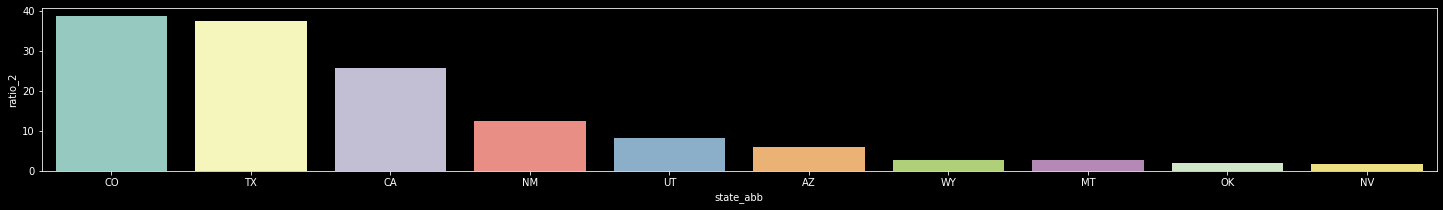

In [ ]:
# ▶ CO, TX, CA, ..., NV, which has the lowest water storage ratio among the top 10 drought areas.
sns.barplot(x="state_abb", y='ratio_2', data=df_merge);
plt.gcf().set_size_inches(25, 3)